# Predicting Player salary.
---------------
* In this notebook, we are going to find out which player attributes affect the salary earned by the players in the FIFA 18 data set/ our training data. 

In [52]:
# Importing our libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import sklearn as sk
import sklearn.tree as tree
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
# 
import statsmodels.api as sm

import statsmodels.formula.api as smf
from math import sqrt

### Overview.
---------------
* This are the steps we going to go through in order to reach our final model and prediction.
------------

**Data Aqcuisition.**
* Get the data set in form of a DataFrame.

**Data Cleaning**
* Remove all the null values in our DataFrame, and make sure all of our values are in the desired format.

**Describe our Data**
* Use the Describe() method on our data.
* Explain and describe our Data.
* Data source.

**Distribution**
* check data for continuous data, i.e Age.
* Identify the continuous data.
* Plot models to check continuous data distribution .
    - Identify our Outliers
        - Explore our outliers.
        - Exclude them or not.


**Relationships**
* plot trendline for each variable.
* Matrix scatterplot.

**Transformation**
* Transform if their relationship is not linear.
* Normalise abnormal data.

**Plot**
* Plot a **Multivariate** graph.
* Run multivariable regression. 
* Interpret multivariable regression attributes, i.e P_value.

**Compare**
* Plot a general figure containing every considerable player attributes.
* Identify most important player attributes from the plotted figure.

### Data aqcuisition.
----------------
get the data set in form of a DataFrame.

In [2]:
# Read the csv file using the pandas method read_csv to read th file
file = 'CompleteDataset.csv' # iniitialize file name to file
df =  pd.read_csv(file, dtype="unicode") #read dataset as df with dtype as unicode to
##########################################reduce spaced used to read the data type.

In [3]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [4]:
data = df[['Overall','Potential', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy','Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']]

## Data Cleaning
-----------------------
Remove all the null values in our DataFrame, and make sure all of our values are in the desired format.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 33 columns):
Overall               17981 non-null object
Potential             17981 non-null object
Wage                  17981 non-null object
Special               17981 non-null object
Acceleration          17981 non-null object
Aggression            17981 non-null object
Agility               17981 non-null object
Balance               17981 non-null object
Ball control          17981 non-null object
Composure             17981 non-null object
Crossing              17981 non-null object
Curve                 17981 non-null object
Dribbling             17981 non-null object
Finishing             17981 non-null object
Free kick accuracy    17981 non-null object
Heading accuracy      17981 non-null object
Interceptions         17981 non-null object
Jumping               17981 non-null object
Long passing          17981 non-null object
Long shots            17981 non-null object
Marking    

This is Data is not clean, It is made up of objects even though the DataFrame displays numerical values

-------------------
**strategy**: Since we don't want to use all the columns, we'll just subset and clean the required columns.

#### Check all null values.

In [6]:
# Search DataFrame for null values
print("number of null values is",len(np.where(pd.isnull(data))[1]),"values")

number of null values is 0 values


Our DataFrame doesn't consist of any null values, the next step is to check if the values are in the right format.

-----------
#### Correct format and type.

In [7]:
# Get information on data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 33 columns):
Overall               17981 non-null object
Potential             17981 non-null object
Wage                  17981 non-null object
Special               17981 non-null object
Acceleration          17981 non-null object
Aggression            17981 non-null object
Agility               17981 non-null object
Balance               17981 non-null object
Ball control          17981 non-null object
Composure             17981 non-null object
Crossing              17981 non-null object
Curve                 17981 non-null object
Dribbling             17981 non-null object
Finishing             17981 non-null object
Free kick accuracy    17981 non-null object
Heading accuracy      17981 non-null object
Interceptions         17981 non-null object
Jumping               17981 non-null object
Long passing          17981 non-null object
Long shots            17981 non-null object
Marking    

the DataFrame is up of 17981 rows in which every columns consists of, the columns are all objects thus making them incorrectly formated.

 Change the Wage to Numerical format.

In [8]:
# Set The players' value worth and the players' potential into numeric data cause at the moment the data
# is in string format.
wages = np.array(data['Wage'])
salary = []
for c in wages: #iterate over the wages list
    c = c.replace('€','') #remove the Euro symbol, by replacing it with nothing
    if 'K' in c:    #For Thousands
        salary.append(c.replace('K', "000")) #replace the 'K' with actual with zeros
    else:
        salary.append(c)
# change wage dtype to integers
wages = [int(i) for i in salary] 
data = data.copy()
data['Wage'] = np.array(wages).astype('int64')

trying to change the type by using the astype attribute raises an error, it seems values of the cols consist of "+" and "-" special characters. let's remove them.

In [9]:
# Create a Function that will check if a col has any special chars namely the "+" and "-" characters.
def checkCol(col):
#   Initialize an empty list that will store the strings with the special chararcters.
    SC = []
#   check every value inside the given col.
    for string in col:
#       Check if a string contains the "+" special character.
        if "+" in string:
#       If the string contains this character append the string into the list.
            SC.append(string)
#       Check if a string contains the "+" special character.
        elif "-" in string:
#       If the string contains this character append the string into the list.
            SC.append(string)
    return SC

# Check DataFrame for these special characters.
print("acceleration special characters",checkCol(data['Acceleration']))
print("Potential special characters",checkCol(data['Potential']))
print("Strength special characters",checkCol(data['Strength']))
print("Sprint speed special characters",checkCol(data['Sprint speed']))
print("Stamina special characters",checkCol(data['Stamina']))

acceleration special characters ['70+9', '80+1', '49-1', '67+2', '79-2', '65-2', '91-2', '74-3', '75+1', '41-6', '74+1', '70+3', '75+5', '74+2', '71+2', '68+1', '80+1', '71+4', '89-2', '58-10', '78+1', '86+1', '66-1', '66+1', '74+4', '71-3', '80+2', '64-2', '70+3', '57-4', '78+3', '66+1', '73+9', '82-3', '68+3', '68+2', '55-8', '55-1', '43-2', '77+3', '82+10', '70+3', '49-10', '72+1', '61+1', '79+8', '70-2', '60-2', '86+7', '81+4', '69+3', '65-10', '78+1', '89-2', '64-3', '73+4', '75-6', '64+5', '33+10', '92+2', '76-1', '62+2', '65+7', '58+8', '44-2', '77+1', '82+3', '68-1', '67+2', '61+3', '73+3', '73+3', '59+1', '64+12', '74+2', '85-1', '78+14', '59-1', '75+4', '73+10', '71+6', '77+13', '62+1', '64-5']
Potential special characters []
Strength special characters ['70+1', '79+1', '66+1', '70+1', '34+3', '65-2', '76+2', '71+3', '68+1', '47+3', '52-5', '80+1', '68+6', '85-1', '75+5', '87-4', '76+2', '75+2', '83+5', '77-1', '56-5', '85+1', '68+4', '76+1', '76+1', '78+2', '65-1', '83-1', '

In [10]:
def cleanCol(dataFrame, col):
    column = []
#     This for loop will loop over the column and 
    for string in dataFrame[col]:
        if "+" in string:
            frst, last = string.split("+")
            value = int(frst)
            column.append(value)
        elif "-" in string:
            frst, last = string.split('-')
            value = int(frst)
            column.append(value)
        else:
            value = int(string)
            column.append(value)
    data[col] = np.array(column).astype('int64')         
    return dataFrame

In [11]:
data.columns

Index(['Overall', 'Potential', 'Wage', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys'],
      dtype='object')

In [12]:
# Clean all of the columns using above define function.
for col in ['Overall', 'Potential', 'Special', 'Acceleration',
       'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure',
       'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']:
    cleanCol(data, col)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 33 columns):
Overall               17981 non-null int64
Potential             17981 non-null int64
Wage                  17981 non-null int64
Special               17981 non-null int64
Acceleration          17981 non-null int64
Aggression            17981 non-null int64
Agility               17981 non-null int64
Balance               17981 non-null int64
Ball control          17981 non-null int64
Composure             17981 non-null int64
Crossing              17981 non-null int64
Curve                 17981 non-null int64
Dribbling             17981 non-null int64
Finishing             17981 non-null int64
Free kick accuracy    17981 non-null int64
Heading accuracy      17981 non-null int64
Interceptions         17981 non-null int64
Jumping               17981 non-null int64
Long passing          17981 non-null int64
Long shots            17981 non-null int64
Marking               17981 non

From the information returned above it seems that the data is clean and ready to be analysed.

In [14]:
data.describe()

,Overall,Potential,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,...,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,66.247984,71.190813,11546.966242,1594.095100,64.600578,55.822257,63.342417,63.815528,58.109838,57.896057,...,61.904844,58.302931,55.661031,45.572048,64.832212,63.261109,47.446026,65.291363,53.022635,43.227852
std,6.987965,6.102199,23080.000139,272.151435,14.907052,17.468440,14.791361,14.094377,16.799127,12.926942,...,9.171952,14.922538,17.398559,21.484684,14.637391,15.922908,21.834465,12.617383,14.387463,17.735041
min,46.000000,46.000000,0.000000,728.000000,11.000000,11.000000,14.000000,11.000000,8.000000,5.000000,...,28.000000,10.000000,3.000000,4.000000,11.000000,12.000000,4.000000,12.000000,10.000000,4.000000
25%,62.000000,67.000000,2000.000000,1449.000000,56.000000,43.000000,55.000000,56.000000,53.000000,51.000000,...,55.000000,53.000000,46.000000,24.000000,57.000000,56.000000,26.000000,58.000000,43.000000,30.000000
50%,66.000000,71.000000,4000.000000,1633.000000,67.000000,59.000000,65.000000,66.000000,63.000000,60.000000,...,62.000000,62.000000,59.000000,52.000000,67.000000,66.000000,54.000000,66.000000,55.000000,44.000000
75%,71.000000,75.000000,12000.000000,1786.000000,75.000000,69.000000,74.000000,74.000000,69.000000,67.000000,...,68.000000,68.000000,69.000000,64.000000,75.000000,74.000000,66.000000,74.000000,64.000000,57.000000
max,94.000000,94.000000,565000.000000,2291.000000,96.000000,96.000000,96.000000,96.000000,95.000000,96.000000,...,96.000000,92.000000,94.000000,91.000000,96.000000,95.000000,92.000000,98.000000,94.000000,91.000000


The wage column shows some odd information, It's minimum value is €0, which is highly unlikely. checking row is the next step.

In [15]:
zero = data[data['Wage'] == 0]
len(zero)

248

248 rows of our data is highly wrong.

In [16]:
zero.head()

,Overall,Potential,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
162,83,86,0,1961,75,31,86,80,84,83,...,81,83,76,47,74,76,50,36,83,63
167,83,83,0,2174,64,79,73,67,85,82,...,77,83,83,73,65,89,78,62,85,75
274,82,82,0,2143,67,78,82,60,85,86,...,81,83,78,71,74,85,73,79,78,67
472,80,80,0,1841,74,61,71,71,77,75,...,75,72,79,25,75,69,33,76,66,74
488,80,80,0,2069,66,53,66,66,84,68,...,83,81,81,59,67,71,68,78,81,77


If we do nothave the predicted variable there is no neeed to include the data in our matrix.

In [17]:
clean = data[data['Wage'] > 0]
print("Min :",min(clean['Wage']))
print("Max :",max(clean['Wage']))

Min : 1000
Max : 565000


Now we begin.

In [18]:
data_corr = clean.corr()
wages = data_corr['Wage']
pos_corr = wages[wages > 0.3]
neg_corr = wages[wages < -0.4]
print(pos_corr)
print(neg_corr)

Overall          0.598918
Potential        0.521456
Wage             1.000000
Special          0.370389
Composure        0.394924
Reactions        0.506631
Short passing    0.310531
Vision           0.320909
Name: Wage, dtype: float64
Series([], Name: Wage, dtype: float64)


These are the columns we're going to use in our Analysis

In [19]:
cols = ['Wage','Overall','Potential','Special', 'Reactions','Short passing','Vision']
Ndata = clean[cols]
Ndata.head(2)

,Wage,Overall,Potential,Special,Reactions,Short passing,Vision
0,565000,94,94,2228,96,83,85
1,565000,93,93,2154,95,88,90


### Describe our Data
* Use the Describe() method on our data.
* Explain and describe our Data.
* Data source

In [20]:
Ndata.describe()

,Wage,Overall,Potential,Special,Reactions,Short passing,Vision
count,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000,17733.000000
mean,11708.453166,66.232786,71.211978,1594.386003,61.892573,58.341397,53.037726
std,23200.122784,7.001454,6.106766,271.931089,9.183422,14.879324,14.355175
min,1000.000000,46.000000,46.000000,728.000000,28.000000,10.000000,10.000000
25%,2000.000000,62.000000,67.000000,1449.000000,55.000000,53.000000,43.000000
50%,4000.000000,66.000000,71.000000,1633.000000,62.000000,62.000000,55.000000
75%,12000.000000,71.000000,75.000000,1785.000000,68.000000,68.000000,64.000000
max,565000.000000,94.000000,94.000000,2291.000000,96.000000,92.000000,94.000000


Our useable Dataset is made up of 6 columns and 17981 rows. The dataset consist of player attributes such as potential, speed and Acceleration. The data is not normalized, standardize or transformed in anyway. The Data is from the FIFA 2018 database.

In [21]:
Ndata.corr()

,Wage,Overall,Potential,Special,Reactions,Short passing,Vision
Wage,1.000000,0.598918,0.521456,0.370389,0.506631,0.310531,0.320909
Overall,0.598918,1.000000,0.683018,0.606545,0.840990,0.490985,0.481540
Potential,0.521456,0.683018,1.000000,0.399892,0.519455,0.371508,0.339982
Special,0.370389,0.606545,0.399892,1.000000,0.589096,0.902850,0.754772
Reactions,0.506631,0.840990,0.519455,0.589096,1.000000,0.465912,0.483590
Short passing,0.310531,0.490985,0.371508,0.902850,0.465912,1.000000,0.721000
Vision,0.320909,0.481540,0.339982,0.754772,0.483590,0.721000,1.000000


### Distribution
--------
* check data Distribution for continuous data.
* Identify the continuous data.
* Plot models to check continuous data distribution .
    * Identify our Outliers
        *Explore our outliers.
        *Exclude them or not.

#### plotting distribution models each of our variables. 

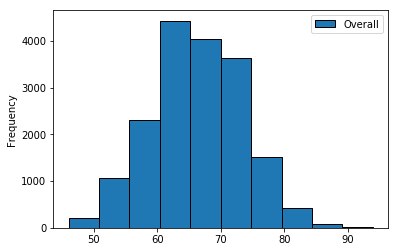

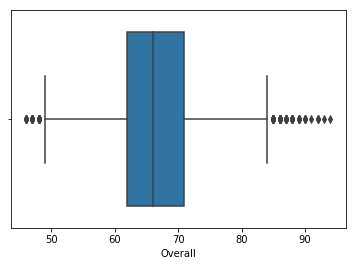

The Min is: 46
The Max is: 94
The average is: 66.23278633057012


In [22]:
# 1. Overall Distribution
Ndata.plot(y='Overall', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Overall'])
plt.show()
print("The Min is:",min(Ndata['Overall']))
print("The Max is:",max(Ndata['Overall']))
print("The average is:",sum(Ndata['Overall'])/len(Ndata['Overall']))

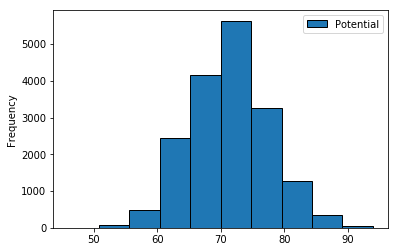

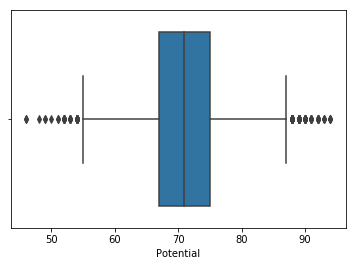

The Min is: 46
The Max is: 94
The average is: 71.21197766875318


In [23]:
#2. Potential Distribution
Ndata.plot(y='Potential', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Potential'])
plt.show()
print("The Min is:",min(Ndata['Potential']))
print("The Max is:",max(Ndata['Potential']))
print("The average is:",sum(Ndata['Potential'])/len(Ndata['Potential']))

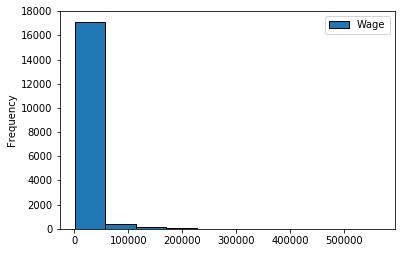

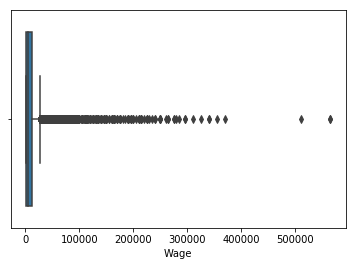

The Min is: 1000
The Max is: 565000
The average is: 11708.453166412903


In [24]:
#3. Wage Distribution
Ndata.plot(y='Wage', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Wage'])
plt.show()
print("The Min is:",min(Ndata['Wage']))
print("The Max is:",max(Ndata['Wage']))
print("The average is:",sum(Ndata['Wage'])/len(Ndata['Wage']))

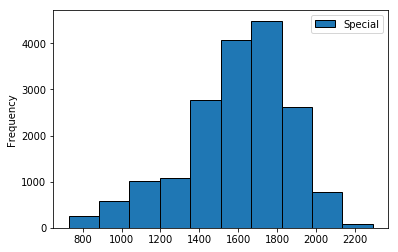

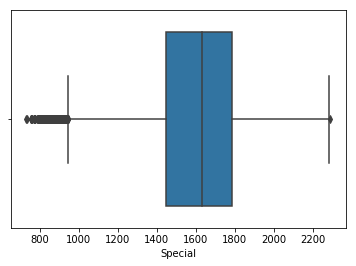

The Min is: 728
The Max is: 2291
The average is: 1594.3860034963063


In [25]:
#4. Special Distribution
Ndata.plot(y='Special', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Special'])
plt.show()
print("The Min is:",min(Ndata['Special']))
print("The Max is:",max(Ndata['Special']))
print("The average is:",sum(Ndata['Special'])/len(Ndata['Special']))

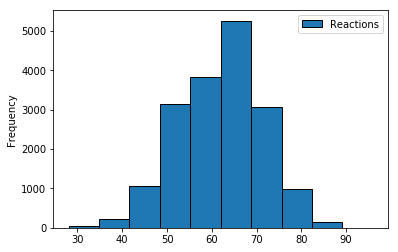

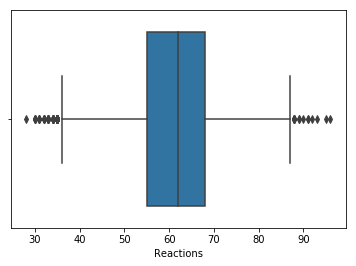

The Min is: 28
The Max is: 96
The Average is: 61.892573168668584


In [26]:
#5. Reactions Distribution
Ndata.plot(y='Reactions', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Reactions'])
plt.show()
print("The Min is:",min(Ndata['Reactions']))
print("The Max is:",max(Ndata['Reactions']))
print("The Average is:",sum(Ndata['Reactions'])/len(Ndata['Reactions']))

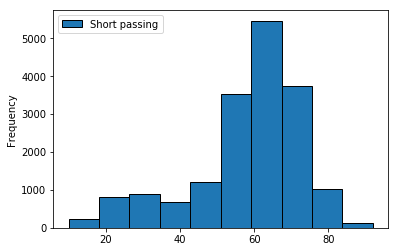

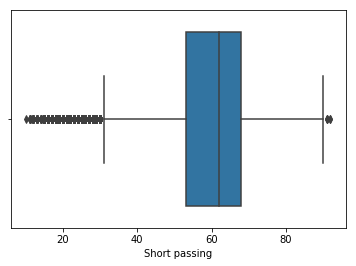

The Min is: 10
The Max is: 92
The average is: 58.34139739468787


In [27]:
#6. Short passing Distribution
Ndata.plot(y='Short passing', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Short passing'])
plt.show()
print("The Min is:",min(Ndata['Short passing']))
print("The Max is:",max(Ndata['Short passing']))
print("The average is:",sum(Ndata['Short passing'])/len(Ndata['Short passing']))

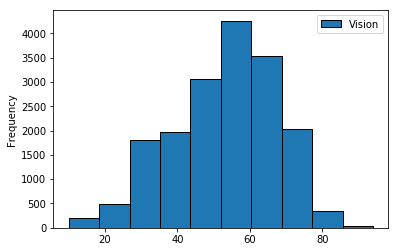

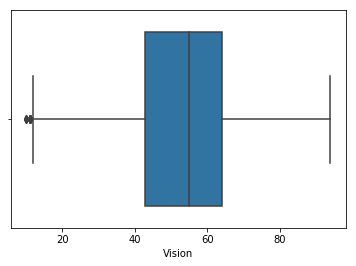

The Min is: 10
The Max is: 94
The average is: 53.03772627305025


In [28]:
#7. Vision Distribution
Ndata.plot(y='Vision', kind='hist', edgecolor='black')
plt.show()
sns.boxplot(x=Ndata['Vision'])
plt.show()
print("The Min is:",min(Ndata['Vision']))
print("The Max is:",max(Ndata['Vision']))
print("The average is:",sum(Ndata['Vision'])/len(Ndata['Vision']))

## Relationships
----------
* plot trendline for each variable.
* Matrix scatterplot.

##### Matrix plot.

**Every attr. V.S Every other attr.**

In [29]:
print(min(Ndata['Wage']))

1000


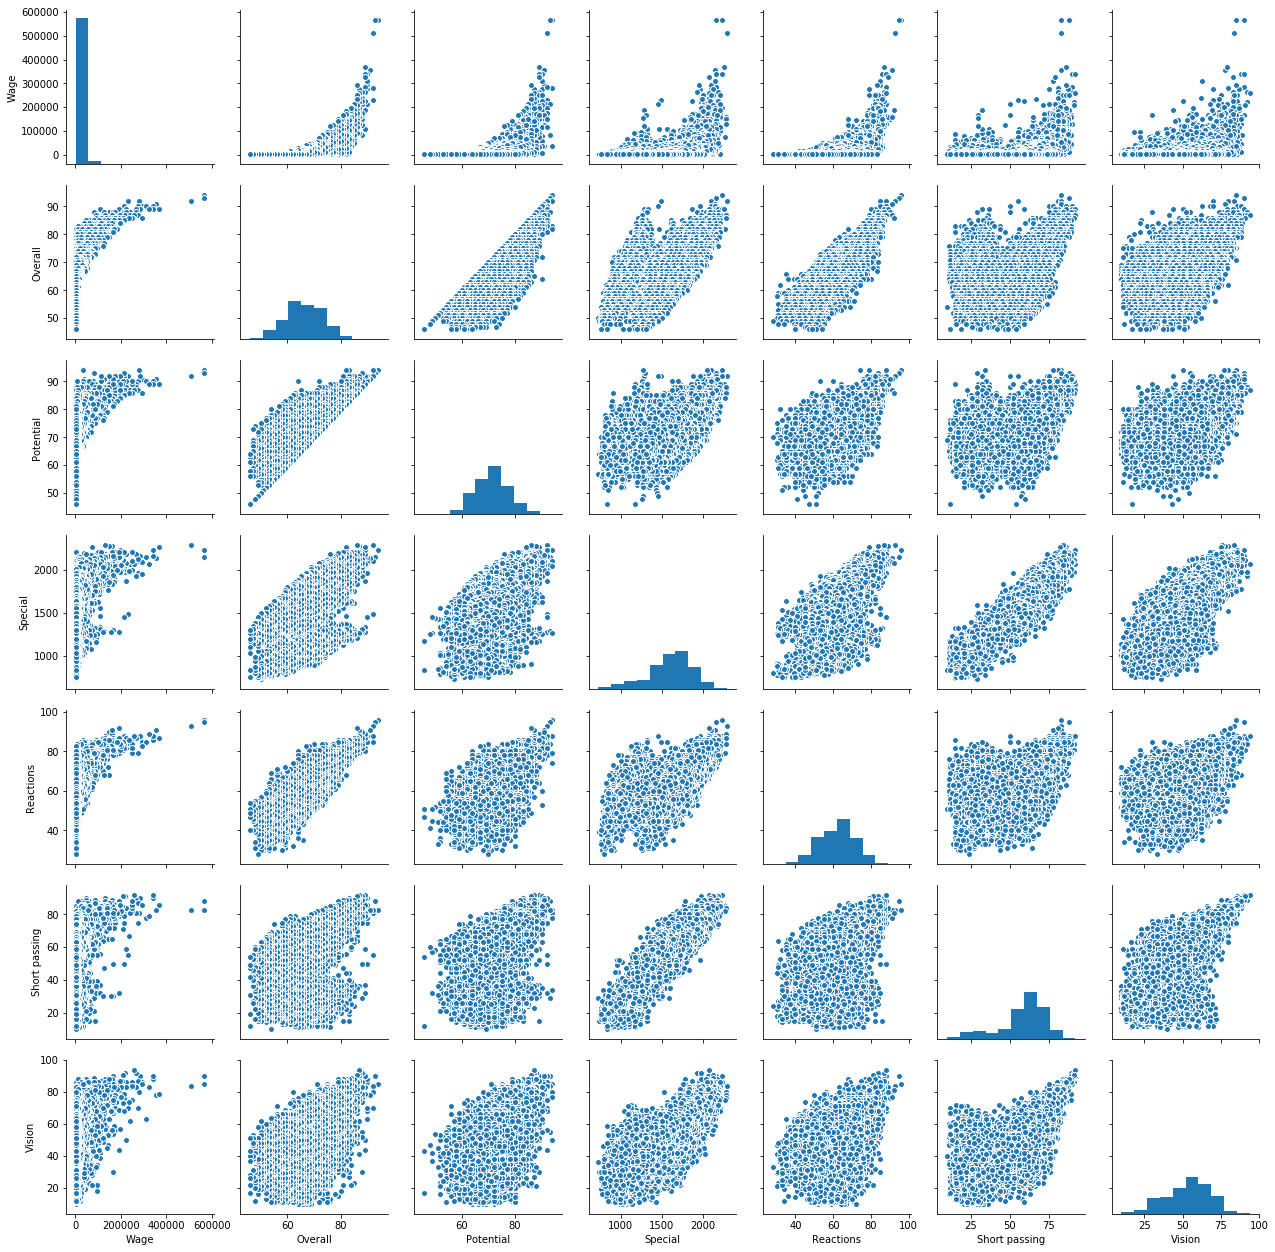

In [30]:
sns.pairplot(Ndata)
plt.show()

**Wage attr. V.S Every other attr.**

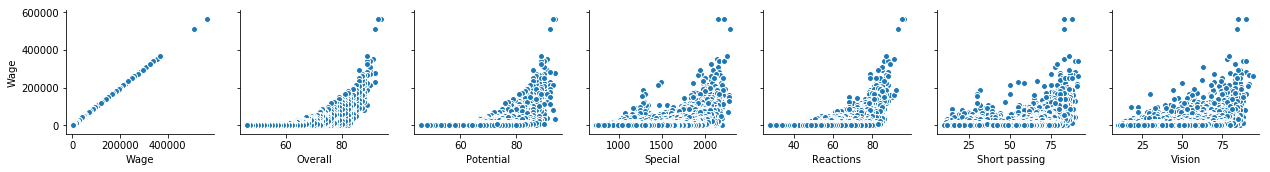

In [31]:
sns.pairplot(data=Ndata, y_vars=['Wage'],x_vars=cols)
plt.show()

#### Transformation
------------
* Transform if their relationship is not linear.
* Normalise abnormal data.

In [32]:
Ndata.head()

,Wage,Overall,Potential,Special,Reactions,Short passing,Vision
0,565000,94,94,2228,96,83,85
1,565000,93,93,2154,95,88,90
2,280000,92,94,2100,88,81,80
3,510000,92,92,2291,93,83,84
4,230000,92,92,1493,85,55,70


/home/johan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


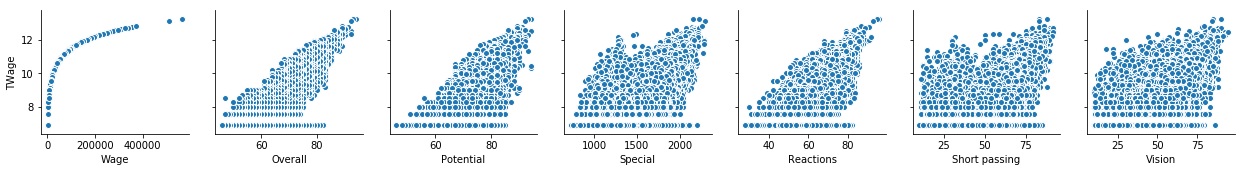

In [33]:
# Transform data 
# Independent variable
X = np.log(np.array(Ndata['Wage'])).astype('float')
# Add variable to DF
Ndata['TWage'] = X
sns.pairplot(data=Ndata, y_vars=['TWage'],x_vars=cols)
plt.show()

With the Independent variable transformed we can now Standardize the  Variables so that their Mean is Zero and their standard deviation is 1.

**Data Standardization**

---------
For standardizing I'll use the Usual standardizing method: subtract the mean the divide by the standard Deviation.

In [34]:
# Standardizing
Standardized= pd.DataFrame()
for col in ['Overall','Potential','Special','Reactions','Short passing','Vision']:
    NewC = []
    for value in Ndata[col]:
        Vs = (value - np.average(Ndata[col]))/np.std(data[col])
        NewC.append(Vs)
    Standardized[col] = np.array(NewC).astype('float')

In [35]:
Standardized['Wage'] = Ndata['TWage']

In [36]:
# Verification
print(Ndata.shape)
print(Standardized.shape)

(17733, 8)
(17733, 7)


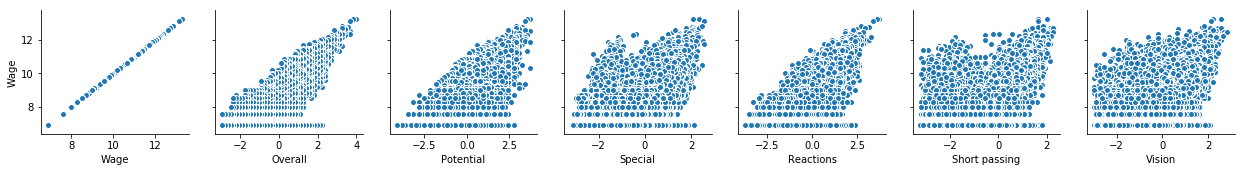

In [37]:
sns.pairplot(data=Standardized, y_vars=['Wage'],x_vars=cols)
plt.show()

**Decision tree regression**

In [38]:
# training set
train = Standardized.copy()
X = train[['Overall','Potential','Special','Reactions','Short passing','Vision']]
y = train.Wage

In [39]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
type(X_test)

pandas.core.frame.DataFrame

In [40]:
X_train.shape, X_test.shape

((11881, 6), (5852, 6))

In [41]:
# Decision tree regressor
reg = sk.tree.DecisionTreeRegressor()

In [42]:
# Fit the regressin model
y_train = y_train.fillna(1)
X_train = X_train.fillna(1)

In [43]:
 reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
# Predictions
X_test = X_test.fillna(method='ffill')
y_pred = reg.predict(X_test)

**Multilinear regression**

In [45]:
# training data set
train = Standardized[Standardized['Wage'] > 0]
train.head()

,Overall,Potential,Special,Reactions,Short passing,Vision,Wage
0,3.973687,3.734499,2.328232,3.718769,1.652486,2.221598,13.244581
1,3.830580,3.570619,2.056317,3.609738,1.987559,2.569133,13.244581
2,3.687473,3.734499,1.857892,2.846521,1.518457,1.874064,12.542545
3,3.687473,3.406739,2.559727,3.391676,1.652486,2.152091,13.142166
4,3.687473,3.406739,-0.372546,2.519428,-0.223922,1.178995,12.345835


In [46]:
np.where(pd.isnull(train))

(array([], dtype=int64), array([], dtype=int64))

In [47]:
X = train[['Overall','Potential','Special','Reactions','Short passing','Vision']]
y = train.Wage
lm = sk.linear_model.LinearRegression()
model = lm.fit(X,y)

In [48]:
#get predicted y values
predictions = lm.predict(X)
type(predictions)

numpy.ndarray

In [49]:
#get R squared/ Coefficient of determination
lm.score(X,y)

0.6566809700189632

In [50]:
#see regression coefficients
print(lm.coef_)

[ 0.94319096  0.0595663   0.00120245  0.04902368 -0.035533    0.03657201]


In [57]:
#see regression coefficients
lm.intercept_

AttributeError: module 'sklearn.linear_model' has no attribute 'intercept_'

**Regression Prediction Precision**

In [62]:
# Multi-linear regression Mean Squred Error.
rms = sqrt(mse(y, predictions))
print(rms*100)

74.56392001571136


ValueError: Found input variables with inconsistent numbers of samples: [17485, 5852]